# Снижение размерности пространства

Визуализация данных помогает понять их структуру и, как следствие, подсказывает методы анализа этих данных. Однако отображение многомерных данных на плоскости упирается в слишком большое количество измерений. Следовательно, встает задача отображения большого числа измерений на плоскость.

Ниже генерируются данные состоящие из трех четырехмерных сфер, точки в которых распределены нормально. Если мы построим их четырехмерный эпюр, то границу между этими сферами не будет видно.

In [2]:
from sklearn.datasets import make_blobs

# Интерактивный режим отображения рисунков - масштабирование, перемещение, вращение, ...
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
blob_X, y = make_blobs(n_samples=[30, 30, 30], centers=[[-7, -7, -7, -7], [0, 0, 0, 0], [7, 7, 7, 7]], 
                  cluster_std=2.3, random_state=77)

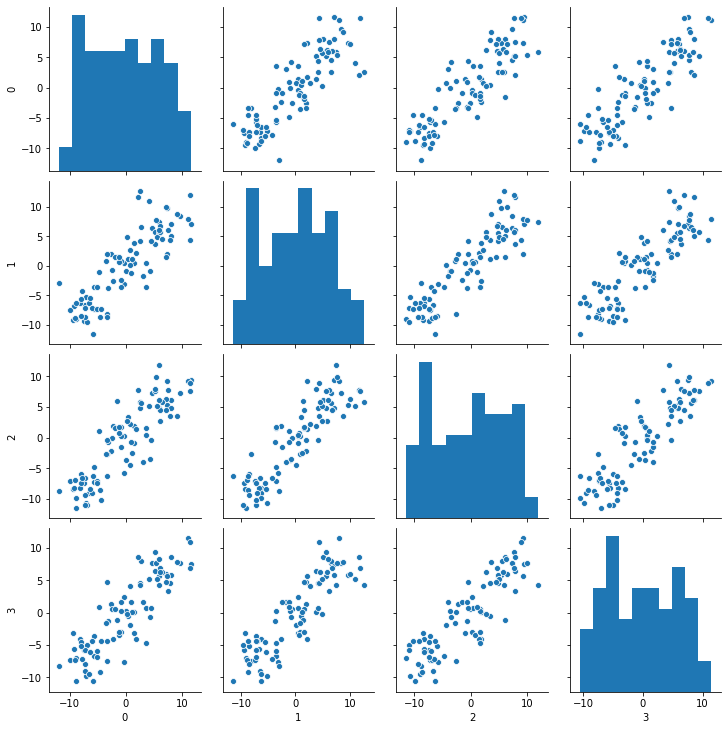

In [5]:
# Построение четырехмерного эпюра для сгенерированных данных.
sns.pairplot(pd.DataFrame(blob_X));

Однако, если подобрать правильную проекцию для отображаемых данных, то сразу станет видно, что сгенерированные сферы не пересекаются (или почти не пересекаются).

Подберем такую проекцию при помощи метода PCA.

In [7]:
from sklearn.decomposition import PCA

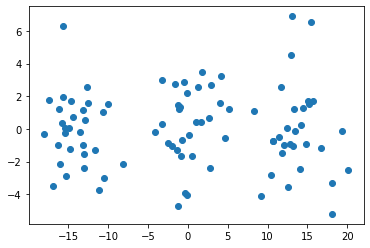

In [4]:
show_reduced = PCA(n_components=2).fit_transform(blob_X)
plt.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced]);

Один из методов такого отображения  Например,

Теперь подробнее рассмотрим <a href="https://habr.com/post/304214/">метод главных компонент</a> (<i>PCA, Principle Component Analysis, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> документация</a></i>, можно немного потрогать руками <a href="https://setosa.io/ev/principal-component-analysis/">здесь</a>, с большим количеством математики метод описывается на <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82">machinelearning.ru</a>). Его суть состоит в том, что мы преобразуем пространство в новое, имеющее меньшую размерность, и строим проекцию на него. Для этого находится новая ось, вдоль которой относительная дисперсия наших данных максимальна. Далее строится проекция всех точек на эту ось, а полученные значения становятся первой координатой в новом пространстве. Это направление отбрасывается, после чего можно снова попытаться найти еще одну ось, еще одну и т.д. Операцию можно повторить столько раз, сколько измерений должно быть в новом пространстве.

![](img/correlated_2d.png)

In [6]:
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
from ipywidgets import Button, interact, interactive_output, HBox, VBox, Layout, \
                       Output, FloatSlider, IntSlider, Checkbox, Select
from IPython.display import display

In [6]:
data = []
posx = 0.0
posy = 0.0
posz = 0.0

def draw_PCA_data():
    global fig1, ax1, fig2, ax2, data
    ax1.clear()
    ax2.clear()
    if len(data)>0:
        dat = np.array(data)
        ax1.scatter(dat[:, 0], dat[:, 1], dat[:, 2], cmap=plt.cm.Set1, edgecolor='g', s=40)
    with out1:
        out1.clear_output(wait=True)
        display(fig1)
    if len(data)>0:
        if methodSelect.value == 'PCA':
            reduced = PCA(n_components=2).fit_transform(data)
        elif methodSelect.value == 'MDS':
            reduced = MDS(n_components=2).fit_transform(data)
        ax2.scatter(reduced[:, 0], reduced[:, 1], c='b', s=50)
    with out2:
        out2.clear_output(wait=True)
        display(fig2)


def init_PCA_drawing(arg):
    global data, posx, posy, posz
    data = []
    posx = 0.0
    posy = 0.0
    posz = 0.0
    draw_PCA_data()
    
def add_data_PCA_drawing(arg):
    global data, sld1, sld2, sld3, sldsx, sldsy, sldsz, posx, posy, posz
    for i in range(5):
        data.append([posx+np.random.standard_normal(1)[0]*sld1.value/20,
                     posy+np.random.standard_normal(1)[0]*sld2.value/20,
                     posz+np.random.standard_normal(1)[0]*sld3.value/20
                    ])
    posx += sldsx.value
    posy += sldsy.value
    posz += sldsz.value
    draw_PCA_data()



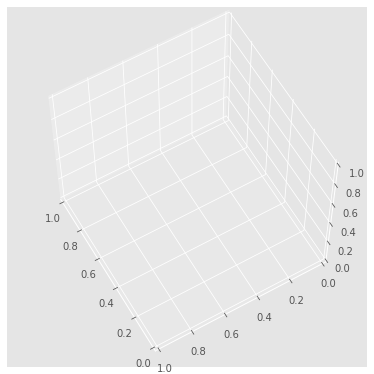

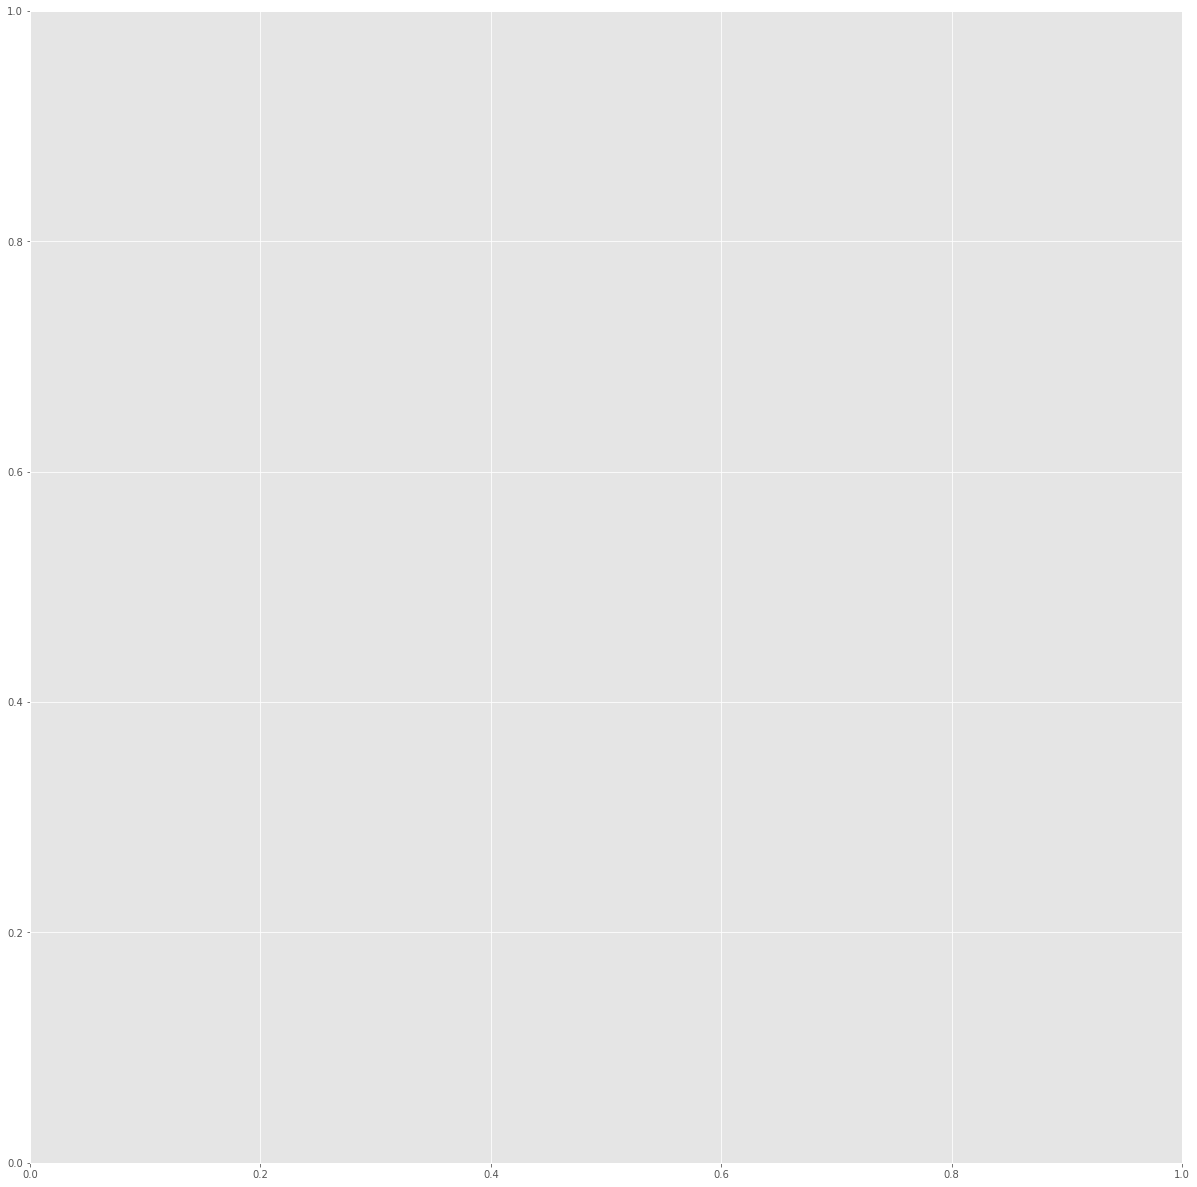

In [7]:
out1=Output(layout=Layout(height='400px', width = '400px', border='solid'))
fig1 = plt.figure(1, figsize=(5, 5))
ax1=Axes3D(fig1, elev=60, azim=150)
out2=Output(layout=Layout(height='400px', width = '400px', border='solid'))
fig2 = plt.figure(2, figsize=(4, 4))
# ax2 = plt.scatter([], [], s=40, fig=fig)
# ax2 = plt.Axes(fig2, [0, 0, 4, 4])
fig2.add_axes([0, 0, 4, 4])
ax2 = fig2.axes[0]

sld1 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation X')
sld2 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation Y')
sld3 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation Z')
sldsx = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by X')
sldsy = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by Y')
sldsz = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by Z')
buttonIni = Button(description='Init')
buttonStep2 = Button(description='Step')
methodSelect = Select(options=['PCA', 'MDS'], value='PCA', description='Method')

bbox1 = HBox(children=(buttonIni, buttonStep2, methodSelect))
bbox2 = HBox(children=(sld1, sld2, sld3 ))
bbox3 = HBox(children=(sldsx, sldsy, sldsz ))
vbox = VBox(children=(bbox1, bbox2, bbox3))
hbox2 = HBox(children=(out1,out2))
hbox = VBox(children=(hbox2, vbox))
display(hbox)
out1.clear_output(wait=True)
out2.clear_output(wait=True)

buttonIni.on_click(init_PCA_drawing)
buttonStep2.on_click(add_data_PCA_drawing)

# generate(None)
# for i in range(100):
#     moveAndDrawPoints(1)


По умолчанию PCA строит преставление пространства той же размерности, что и входные данные, однако сортирует измерения по "важности".<br>
При помощи функции fit_transform мы настраиваем коэффициенты преобразования (fit) и преобразуем переданные точки (transform). Каждое из этих действий для PCA можно производить по отдельности.<br>

Посмотрим как метод себя ведет на некоторых простых данных. Есть линия со случайными смещениями, к которой прибавлена относительно плоская область, идущая вдоль той же линии ("палочка" + "половинка монетки"). Посмотрим на ее преобразования при помощи метода главных компонент.

In [5]:
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [9]:
np.random.seed(17)
pca_len=100

In [10]:
pca_coord=np.zeros((pca_len, 3))
pca_coord2=np.zeros((int(pca_len/2), 3))

pca_coord[:,0]=np.arange(pca_len)
pca_coord[:,1]=3*pca_coord[:,0]+np.random.normal(scale=3., size=(pca_len))
pca_coord[:,2]=5*pca_coord[:,0]+np.random.normal(scale=5., size=(pca_len))

pca_coord2[:,0]=np.arange(pca_len/4, 3*pca_len/4)
pca_coord2[:,1]=[3*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 5, 1) for x in pca_coord2[:,0]]
pca_coord2[:,2]=[5*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 1, 1) for x in pca_coord2[:,0]]

pca_coord=np.vstack((pca_coord, pca_coord2))

Для начала нарисуем данные при помощи seaborn.

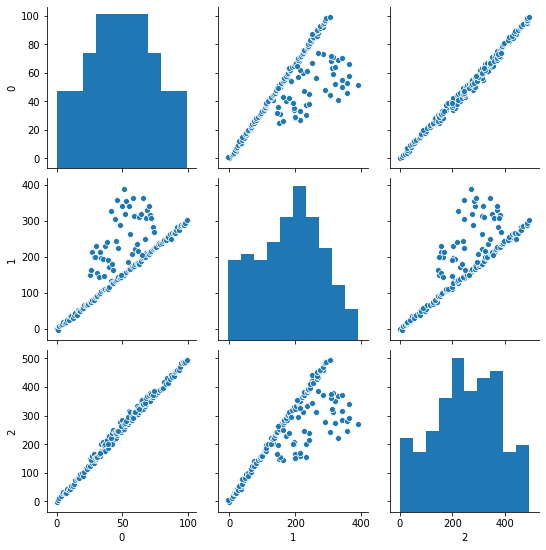

In [11]:
sns.pairplot(pd.DataFrame(pca_coord));

In [12]:
pca=PCA(n_components=2) # Просим PCA вернуть 2 коодинаты. По умолчанию вернет столько же, сколько подадим на вход.
show_reduced = pca.fit_transform(pca_coord)
pca_coord.shape, show_reduced.shape

((150, 3), (150, 2))

Плюсом метода PCA является тот факт, что после нахождения осей в новое пространство можно преобразовать любую точку исходного пространства. Это возможно, так как преобразование сводится к повороту, масштабированию и проекции.

In [13]:
# Координаты осей в исходном пространстве.
pca.components_

array([[-0.15786887, -0.57311394, -0.8041255 ],
       [-0.13885943,  0.81913003, -0.55654654]])

In [14]:
def plot_PCA(pca_coord):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку.
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='g', s=40)
    ax.set_title("Simple Data")

    plt.show()

    pca=PCA(n_components=2) # Просим PCA вернуть 2 коодинаты. По умолчанию вернет столько же, сколько подадим на вход.
    show_reduced = pca.fit_transform(pca_coord)

    fig, ax = plt.subplots() # Рисуем двумерную картинку.
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b', s=40)
    plt.show()
    

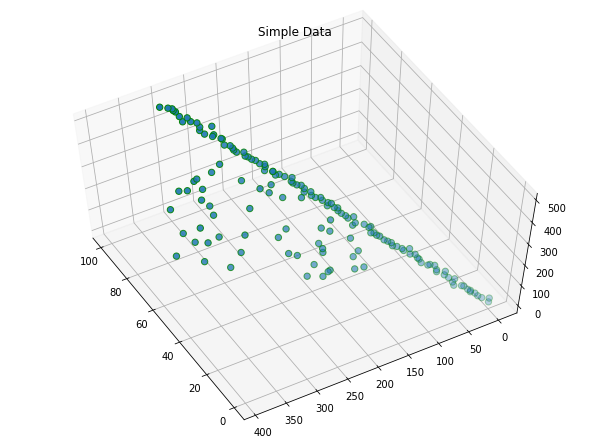

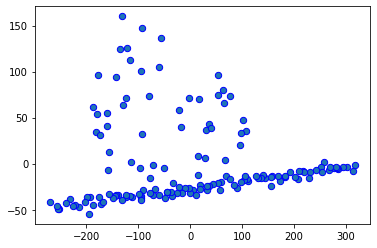

In [15]:
plot_PCA(pca_coord)

Мы видим, что PCA в самом деле повернул систему координат так, чтобы наши данные оказались максимально "в профиль".

Теперь переместим "половинку монетки" из середины "палочки" к одному из ее концов.

<IPython.core.display.Javascript object>


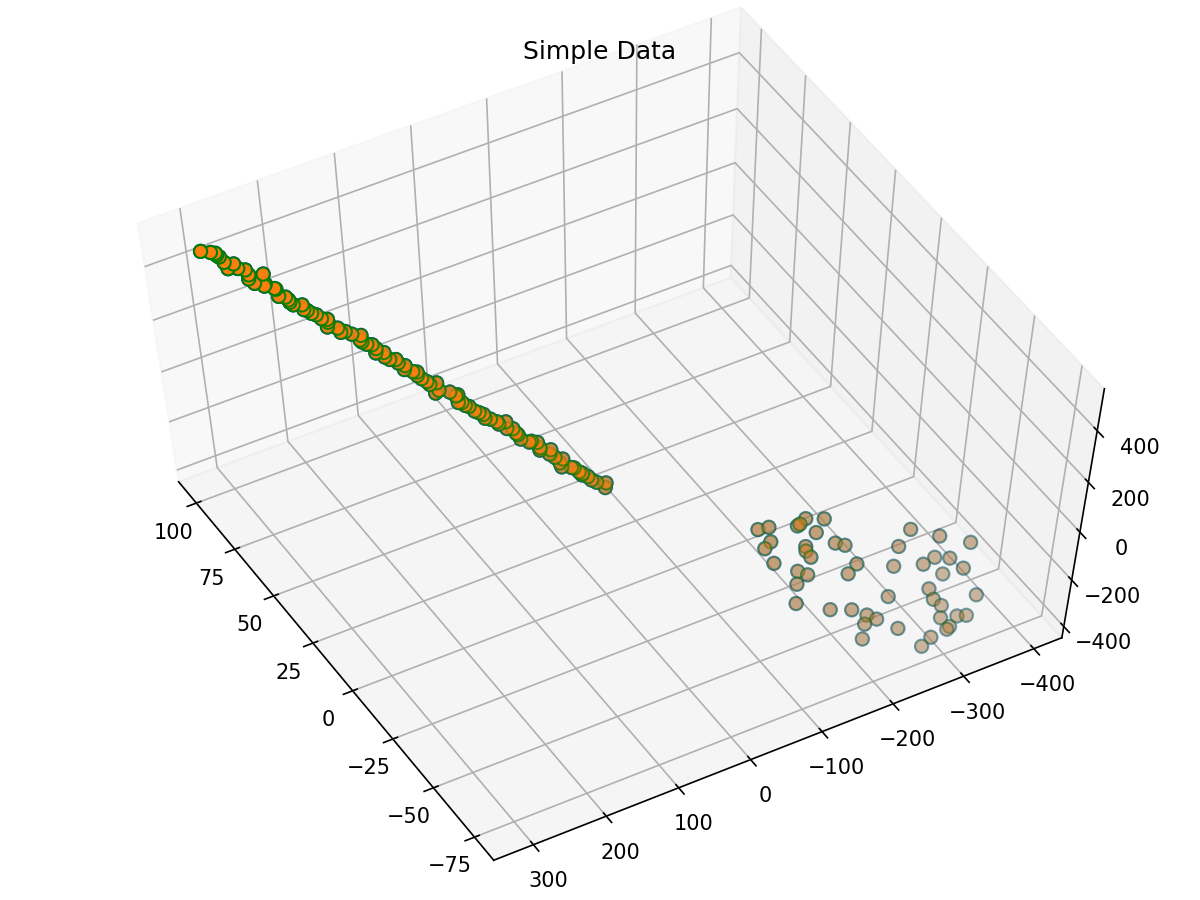

<IPython.core.display.Javascript object>


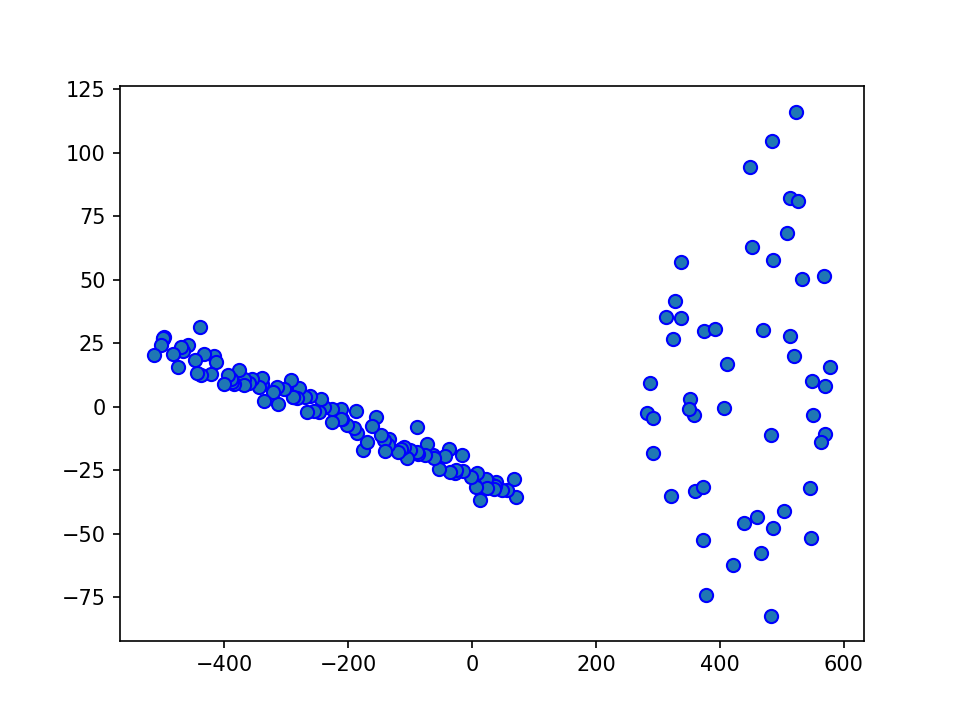

In [5]:
pca_coord3=np.vstack((pca_coord[:pca_len], -pca_coord2))
plot_PCA(pca_coord3)

Метод MDS (<i>Multidimensional Scaling</i>) поступает примерно по тому же принципу, но работает несколько быстрее и лучше. Идея метода состоит в том, что он пытается перейти в пространство меньшей размерности так, чтобы расстояния между объектами в новом пространстве были подобны расстояниям в исходном пространстве.

Однако в отличие от PCA он не умеет сохранять коэффициенты преобразования и использовать их для преобразования новых данных.

In [16]:
from sklearn.manifold import MDS

<IPython.core.display.Javascript object>


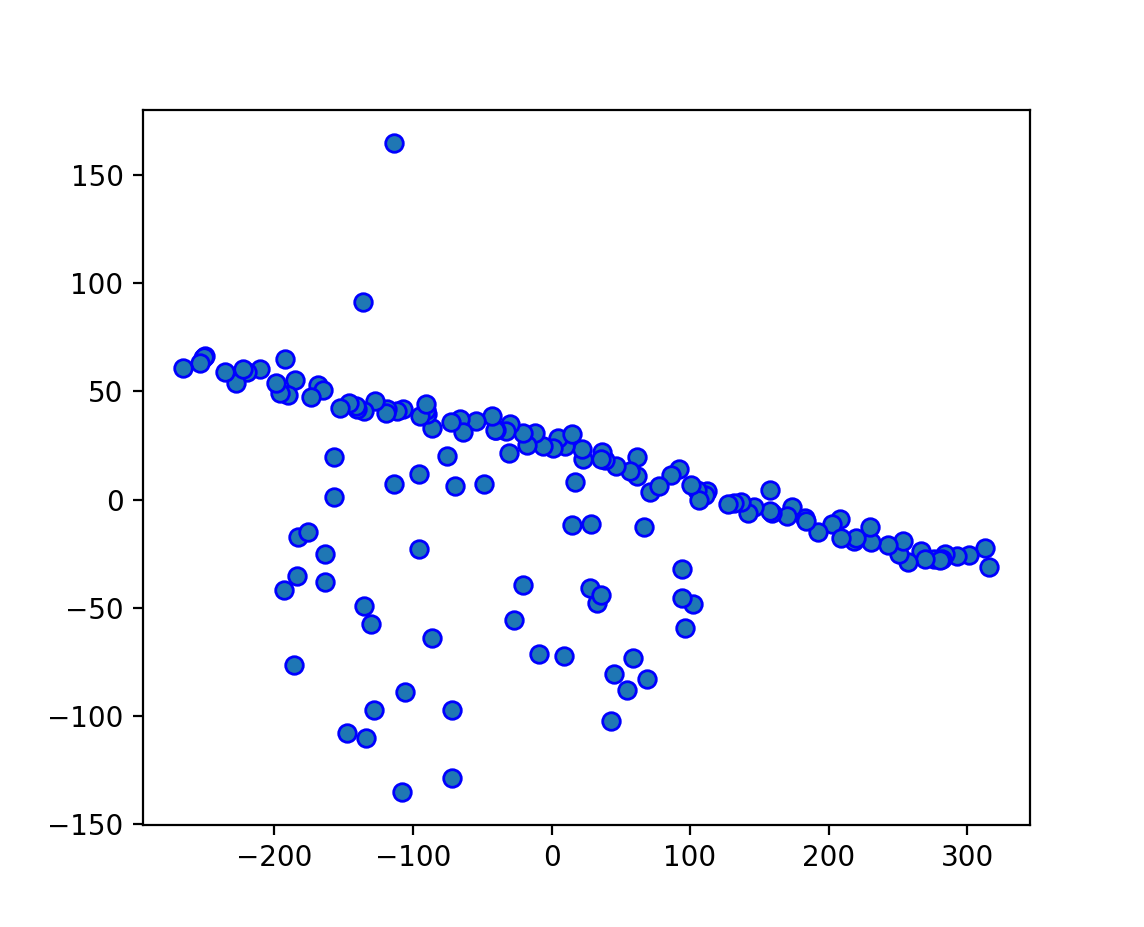

In [6]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


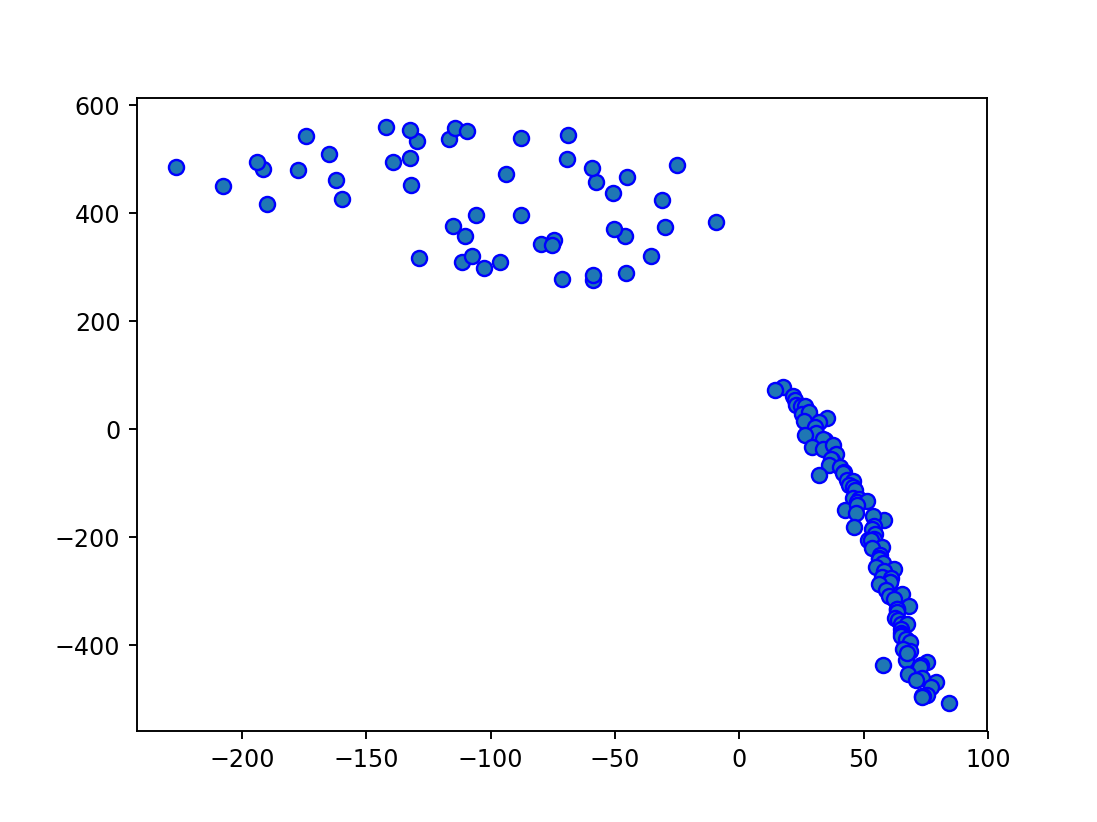

In [8]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord3)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Еще одним методом является t-SNE (<i>t-distributed stochastic neighbor embedding</i>). В отличие от предыдущих двух методов, он не строит проекции, а пытается "вдавить" точки в пространство заданной размерности, соблюдая при этом примерное расположение точек. Очевидно, полностью сохранить расположение получается не всегда, но алгоритм старается сделать так, чтобы соседние точки остались соседними.<br>
Как и MDS, t-SNE принципиально не умеет сохранять правила преобразования пространства, так что преобразовывать надо все точки сразу.<br>
Простое и понятное объяснение, а также визуализацию результатов можно найти [здесь](https://distill.pub/2016/misread-tsne/).
<br>

In [8]:
from sklearn.manifold import TSNE

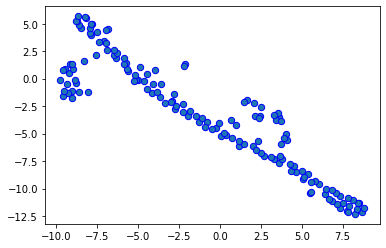

In [21]:
tsne=TSNE()
show_reduced = tsne.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Подобное преобразование можно сравнить с построением проекции глобуса - карты. При построении такой проекции мы тоже пытаеммся снизить размерность трехмерной фигуры до двух измерений. При этом могут использоваться искажения, то есть мы будем сжимать и растягивать карту. При этом могут возникать разрывы в разных местах. В любом случае, точки, которые были рядом (например, по границе карты) оказываются разнесены друг от друга.

На самом деле, t-SNE случайным образом разбрасывает точки по пространству нужной размерности, а потом проводит оптимизацию функционала взаимодействия между точками. ([Видео с объяснениями](https://www.youtube.com/watch?v=NEaUSP4YerM))

Примерно такая же картина в смысле разрывов и искажений наблюдается при применении методов наподобие t-SNE. Для разных начальных расположений точек будет получаться разная картина для искажений.

<img src="img/scale_1200.webp" width="400">
<img src="img/675px-Goode_homolosine_projection_SW.jpg" width="400">
<img src="img/0c41ef6a88a84deaaccf18ae2a5862cd.jpg" width="400">
<img src="img/675px-Bonne_projection_SW.jpg" width="400">

Больше примеров проекций см. <a href = "https://xkcd.com/977/">здесь</a>.



In [9]:
# Глобальные переменные: номер шага, матрица расстояний в исходном пространстве, 
# позиции точек в двумерном пространстве, количество точек.
step_no = 1
dist_matrix = None
positions = None
point_count = 50

# Генерация матрица расстояний для точек. 
# По умолчанию точки расположены на расстоянии 1 друг от друга.
def generate(arg):
    global dist_matrix, positions, point_count, step_no
    
    step_no = 1
    dist_matrix = np.ones((point_count, point_count))
    for i in range(point_count):
        dist_matrix[i,i] = 0 
        
    # Для части точек делаем случайное отклонение [-0.5; +0.5] от 1
    dif_pos = np.random.rand(3 * point_count, 2) * point_count
    dif_pos = dif_pos.astype(np.int32)
    for dp in dif_pos:
        n = np.random.rand(1) - 0.5
        dist_matrix[dp[0], dp[1]] += n
        dist_matrix[dp[1], dp[0]] += n
        
    # Сделаем три компоненты сильной связности, чтобы было видно как они стягиваются друг к другу.
    for k in [[0,5], [10,15], [20,25]]:
        for i in range(k[0], k[1]):
            for j in range(k[0], k[1]):
                if i == j:
                    continue
                n = np.random.rand(1) * 0.2
                dist_matrix[i, j] = n
                dist_matrix[j, i] = n
        
    # Для еще части увеличиваем расстояния.
    dif_pos = np.random.rand(3 * point_count, 2) * point_count
    dif_pos = dif_pos.astype(np.int32)
    for dp in dif_pos:
        n = np.random.standard_normal(1)[0] * 2
        dist_matrix[dp[0], dp[1]] += n
        dist_matrix[dp[1], dp[0]] += n

    # Могли получиться отрицательные расстояния.
    dist_matrix = np.absolute(dist_matrix)
    positions = np.random.rand(point_count, 2)
    # Рисуем начальное расположение точек.
    moveAndDrawPoints(None)

# Расчет силы, действующей на две точки.
def calcForce(pos1, pos2, dist):
    v1 = pos1 - pos2
    rel = np.linalg.norm(v1) / dist
    # Если (расстояние на плоскости) / (расстояние между точками в исходном пространстве) > 1
    # то притягиваются, в противном случае - отталкиваются.
    if rel > 1:
        return v1 * rel
    else:
        return -2 * v1 / rel

# Рассчитываем вектора смещений для точек в зависимости от суммы сил,
# действующих на каждую точку.
def calcVectors(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    for i in range(point_count):
        v = np.zeros(2)
        for j in range(point_count):
            if i == j:
                continue
            v += calcForce(positions[j], positions[i], dist_matrix[i, j])
                
        vectors[i] += v
    # Шаг будем сокращать с течением времени.
    vectors = np.array(vectors) * 0.01 / np.cbrt(step_no+10)
    vectors[vectors>1] = 1
    return vectors

# Здесь имитируем UMAP, добавляя силу, которая пытаетсяя разместить их на круге.
# Не очень хорошо видна какая-либо разница.
def calcVectors2(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    # это расчет силы, отталкивающей точки от их центра масс.
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    center = np.array([cx, cy])
    d = positions - center
    vectors = 100 * d / np.linalg.norm(d) ** 2

    # Это расчет вектора смещений точек.
    for j in range(point_count):
        n1 = positions - positions[j]
        n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
        n3 = np.zeros((point_count, 2))
        for i, nn1 in enumerate(n1):
            if n2[i] > 1:
                n3[i] += nn1 * n2[i]
            elif n2[i] <= 1 and n2[i] != 0:
                n3[i] -= 2 * nn1 / (n2[i]+1e-6)
        vectors[j] += sum(n3)
    vectors *= 0.01 / np.cbrt(step_no+10)
    vectors[vectors>0.5] = 0.5
    return vectors

# Эта функция не возвращает вектор смещений, а просто смещает точки.
# Плюс, здесь сделан аналог далекий SGD - точка перемещается сразу после расчета вектора.
def calcPositions(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    center = np.array([cx, cy])
    d = positions - center
    for i, p in enumerate(d):
        vectors[i] = 0.1 * p / np.linalg.norm(p) ** 2
        if any(vectors[i]>0.1):
            vectors[i] /= (max(vectors[i]) * 10)
#     positions += vectors

    for j in range(point_count):
        for m in range(5):
            n1 = positions - positions[j]
            n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
            n3 = np.zeros((point_count, 2))
            for i, nn1 in enumerate(n1):
                if n2[i] > 1:
                    n3[i] += nn1 * n2[i]
                elif n2[i] <= 1 and n2[i] != 0:
                    n3[i] -= 2 * nn1 / (n2[i]+1e-6)
            v = sum(n3) * 0.01 / np.cbrt(step_no+10) + vectors[j]
            if any(v>0.5):
                v /= max(v) * 2
            positions[j] += v
    return positions

# Рассчитывает нове положения точек и отрисовывает.
def moveAndDrawPoints(arg):
    global dist_matrix, positions, step_no, ax, out
    if arg != None or step_no != 1:
        positions += calcVectors(dist_matrix, positions)
    max_coords = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
    small_pos1, small_pos2 = np.where((dist_matrix<0.2) & (dist_matrix!=0))
    ax.clear()
    ax.scatter(positions[:,0], positions[:,1], s=50)
    ax.scatter(positions[max_coords[0],0], positions[max_coords[0],1], s=50, c='b')
    ax.scatter(positions[max_coords[1],0], positions[max_coords[1],1], s=50, c='b')

    for pos in zip(small_pos1, small_pos2):
        ax.plot([positions[pos[0],0],positions[pos[1],0]], [positions[pos[0],1],positions[pos[1],1]])

    with out:
        out.clear_output(wait=True)
        display(ax.figure)
    step_no += 1
        
# Рассчитывает нове положения точек и отрисовывает (для имитации UMAP).
def moveAndDrawPoints2(arg):
    global dist_matrix, positions, step_no, ax, out
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    if arg != None or step_no != 1:
#         positions += calcVectors2(dist_matrix, positions)
        positions = calcPositions(dist_matrix, positions)
    
    max_coords = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
    small_pos1, small_pos2 = np.where((dist_matrix<0.2) & (dist_matrix!=0))
    ax.clear()
    ax.scatter([cx], [cy], s=50, c='g')
    ax.scatter(positions[:,0], positions[:,1], s=50)
    ax.scatter(positions[max_coords[0],0], positions[max_coords[0],1], s=50, c='b')
    ax.scatter(positions[max_coords[1],0], positions[max_coords[1],1], s=50, c='b')

    for pos in zip(small_pos1, small_pos2):
        ax.plot([positions[pos[0],0],positions[pos[1],0]], [positions[pos[0],1],positions[pos[1],1]])

    with out:
        out.clear_output(wait=True)
        display(ax.figure)
    step_no += 1


/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide


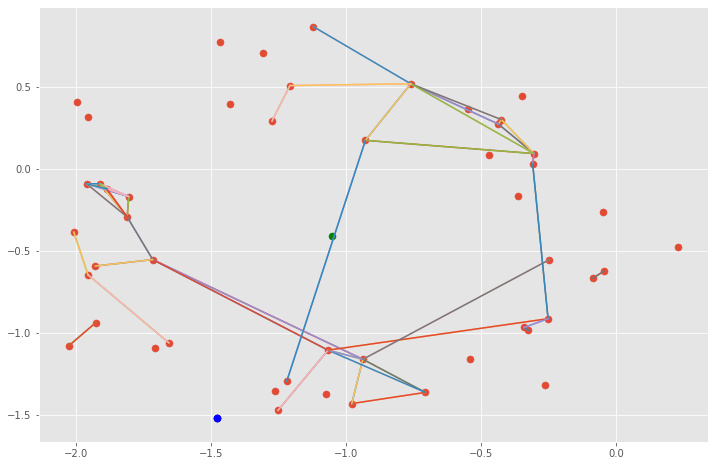

In [11]:
# Отображение точек.
out=Output(layout=Layout(height='400px', width = '600px', border='solid'))
ax=plt.gca()

buttonGen = Button(description='Generate')
buttonStep = Button(description='Step')
vbox = VBox(children=(buttonGen, buttonStep,))
hbox = HBox(children=(out,vbox))
display(hbox)
with out:
    out.clear_output(wait=True)

buttonGen.on_click(generate)
buttonStep.on_click(moveAndDrawPoints2)

generate(None)
for i in range(100):
    moveAndDrawPoints2(1)


Наконец, алгоритм, который появился в 2018 году - UMAP (<i>Uniform Manifold Approximation and Projection</i>). Принцип работы аналогичен t-SNE. Посмотрим и на его результаты.<br>
<b>Внимание!!!</b><br>
Для установки используйте umap-learn (https://pypi.org/project/umap-learn/)<br>
Его интерфейс отличается от библиотеки umap.

`pip install umap-learn`

In [9]:
import umap

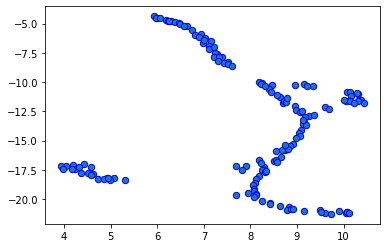

In [18]:
umap_emb = umap.UMAP()
show_reduced = umap_emb.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Теперь посмотрим что сделают эти преобразования с сеткой.

In [11]:
grid_coord=np.array(np.meshgrid(np.arange(10), np.arange(10), np.arange(10), np.arange(10))).T.reshape(-1,4)

Ниже специально приведены значения времени, которое потреовалось для расчета. Вы можете оценить, стоит ли запускать, или можно просто посмотреть на результат.

<IPython.core.display.Javascript object>


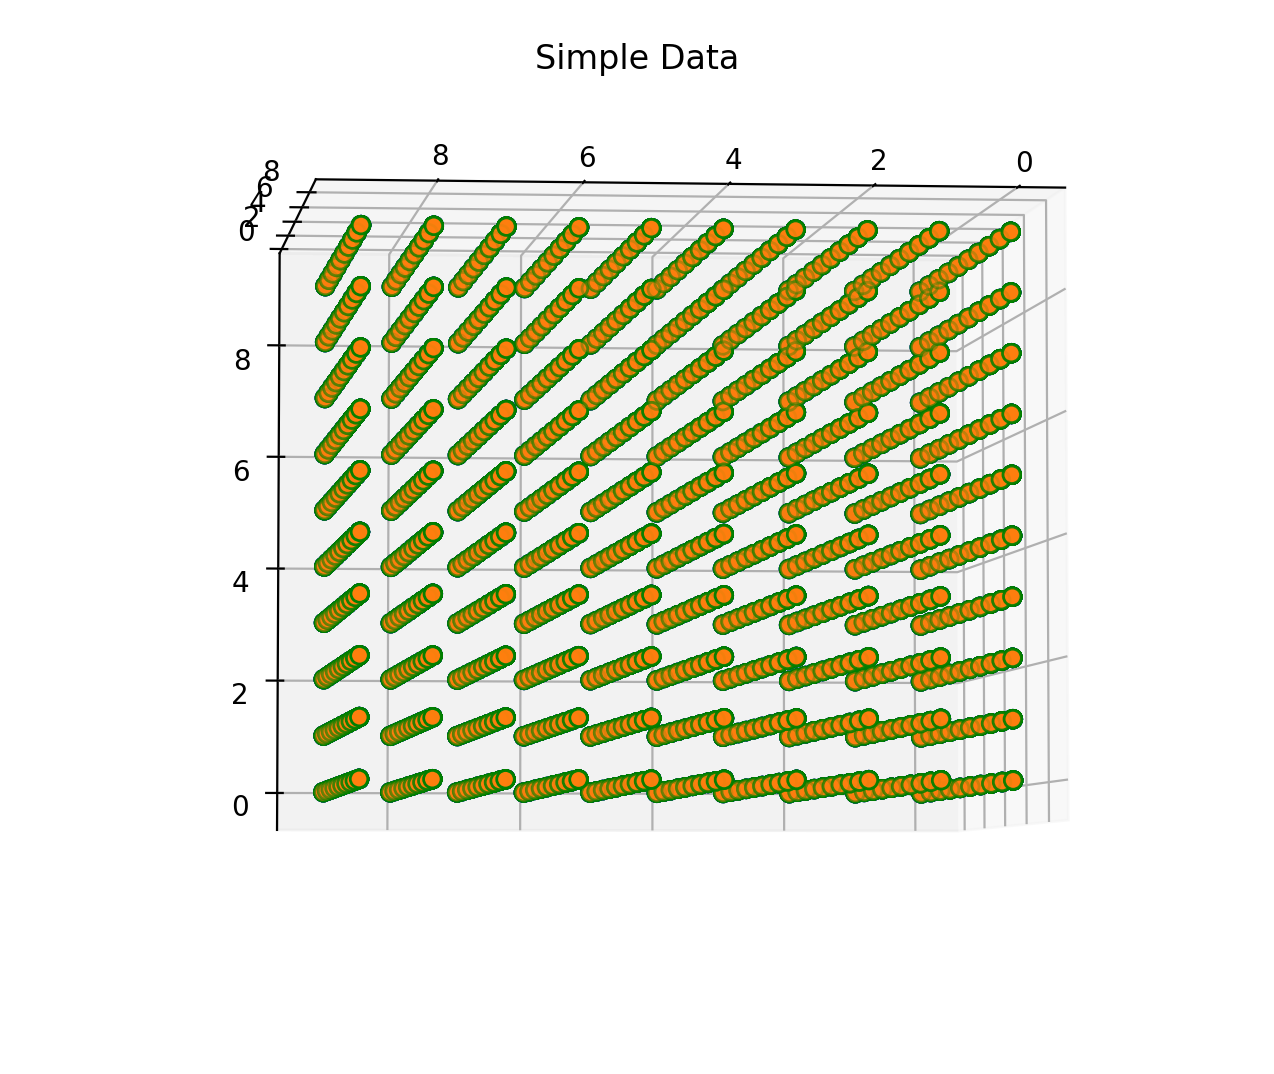

<IPython.core.display.Javascript object>


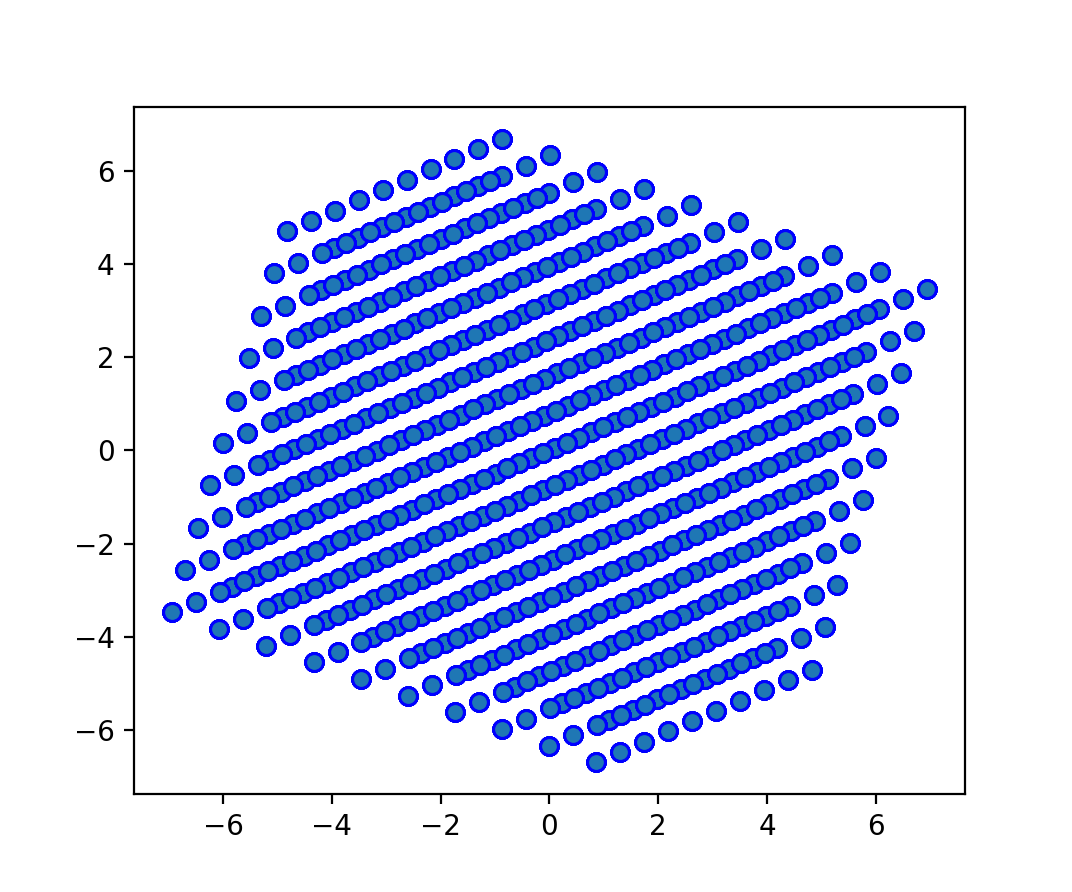

CPU times: user 412 ms, sys: 600 ms, total: 1.01 s
Wall time: 213 ms


In [12]:
%%time

plot_PCA(grid_coord)

<IPython.core.display.Javascript object>


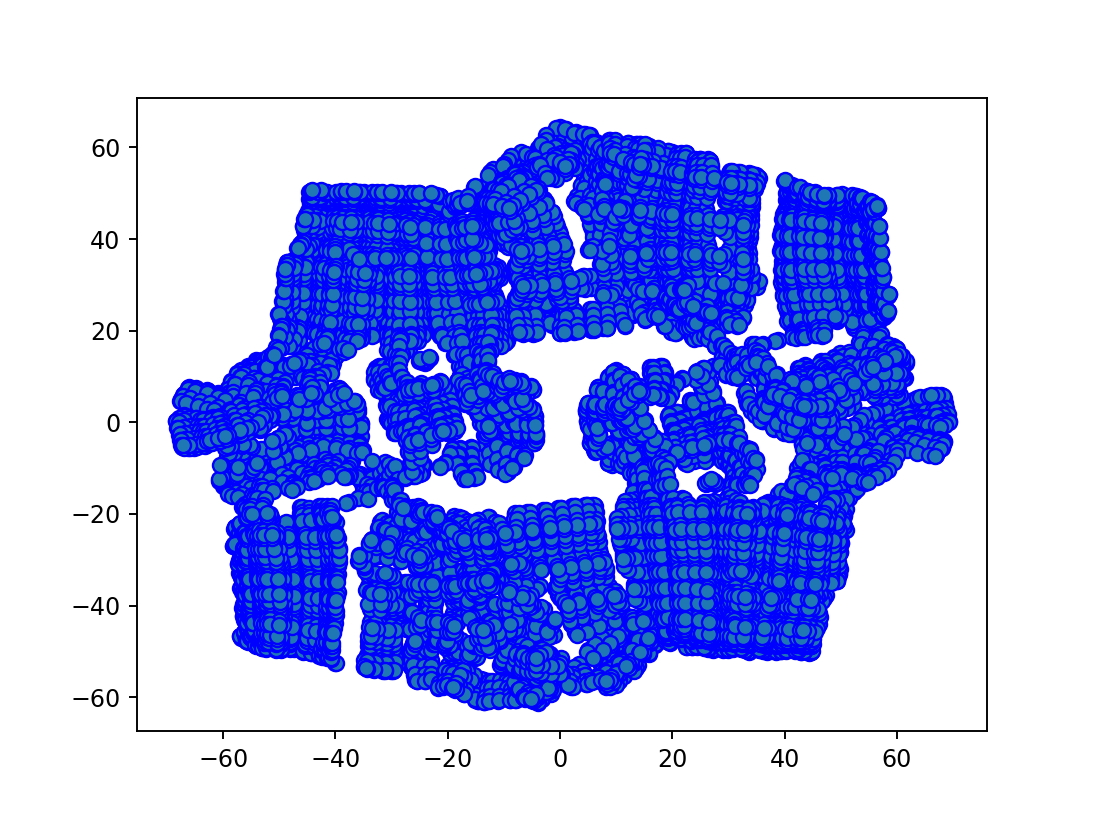

CPU times: user 2min 5s, sys: 17.1 s, total: 2min 22s
Wall time: 2min 23s


In [18]:
%%time
show_reduced = tsne.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


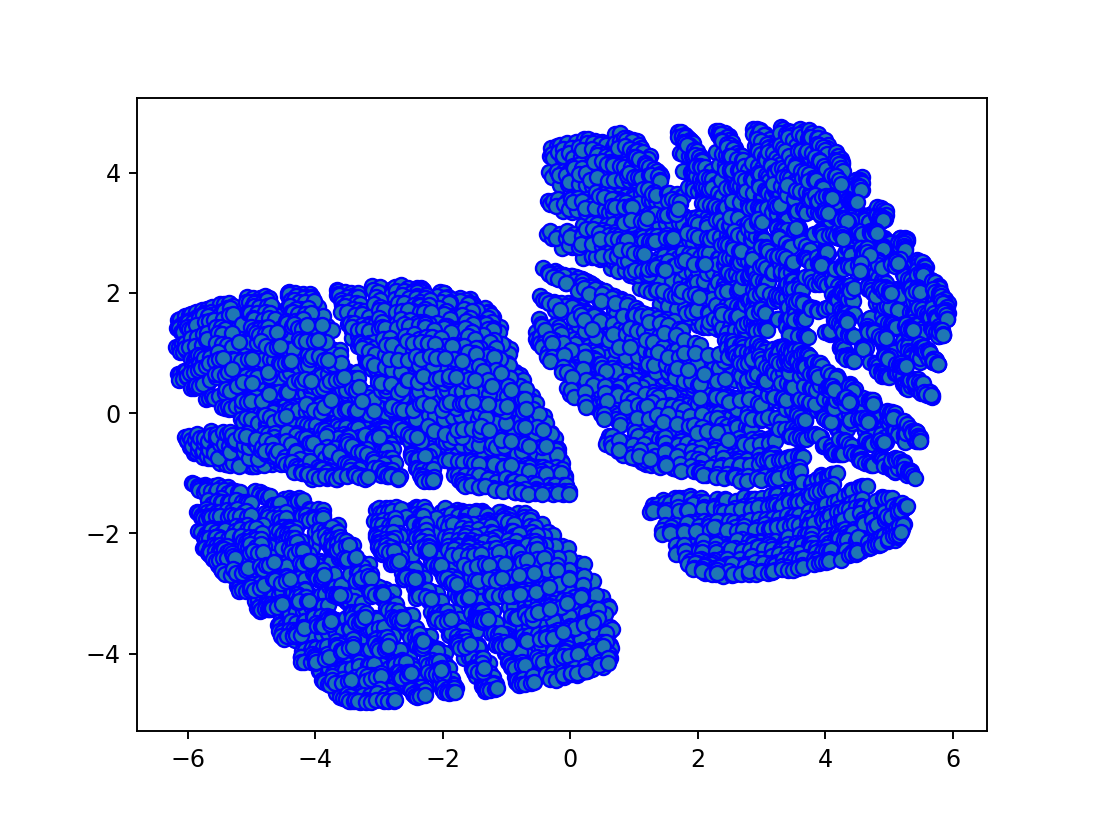

CPU times: user 34.7 s, sys: 2.47 s, total: 37.2 s
Wall time: 33.4 s


In [19]:
%%time
show_reduced = umap_emb.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на три непересекающихся кластера, которые были сгенерированы в начале лекции.

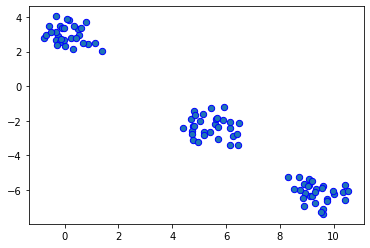

CPU times: user 6.36 s, sys: 73.2 ms, total: 6.44 s
Wall time: 1.41 s


In [56]:
%%time
show_reduced = TSNE().fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

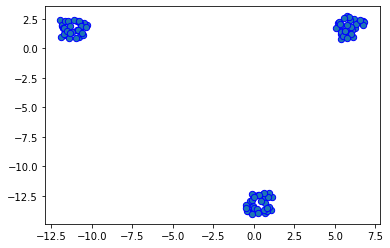

CPU times: user 4 s, sys: 144 ms, total: 4.15 s
Wall time: 4.22 s


In [58]:
%%time
show_reduced = umap.UMAP().fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на классику - ирисы Фишера.

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = sns.load_dataset('iris')

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


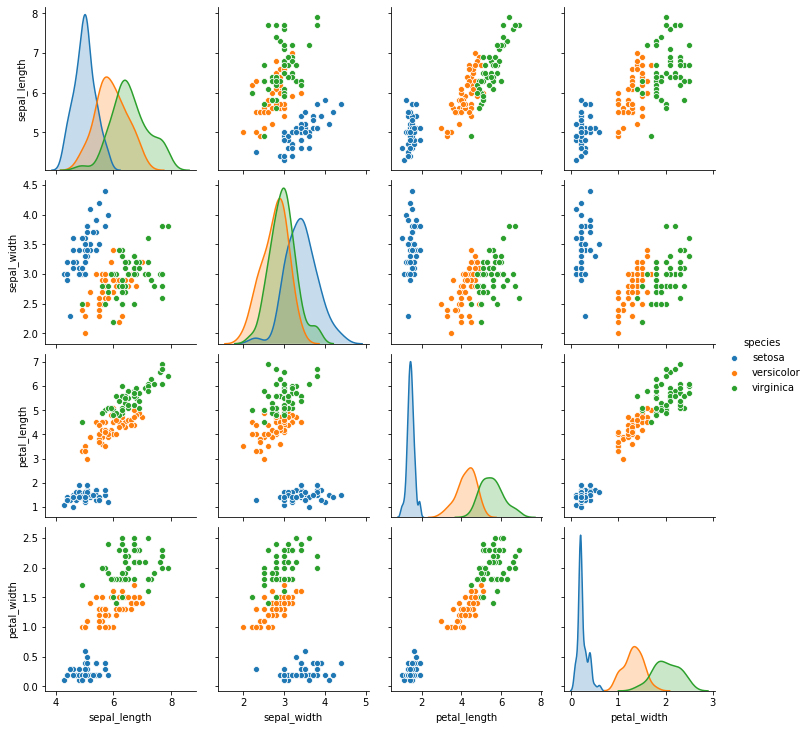

In [25]:
sns.pairplot(iris, hue='species');

In [20]:
X = iris.iloc[:, :4].values

mapping = dict((s, i) for i, s in enumerate(iris.species.unique()))
y = iris.species.replace(mapping).values

X.shape

(150, 4)

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
PC = pca.transform(X)
PC.shape

(150, 2)

In [28]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [24]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

<IPython.core.display.Javascript object>


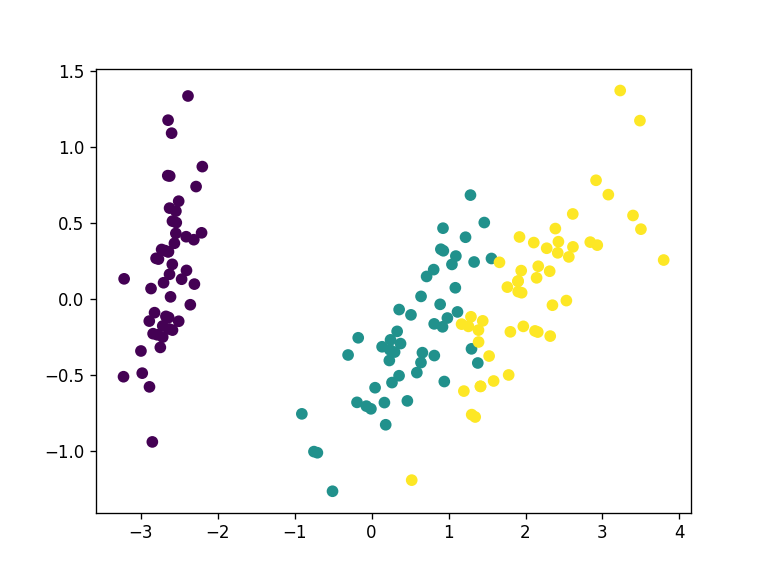

In [26]:
plt.scatter(PC[:,0], PC[:,1],c=y);

Взглянем на t-SNE.

In [29]:
tsne = TSNE(n_components=2)
tsne_iris = tsne.fit_transform(X)
tsne_iris.shape

(150, 2)

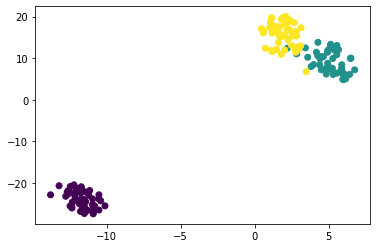

In [30]:
plt.scatter(tsne_iris[:,0], tsne_iris[:,1],c=y);

In [31]:
umap_i = umap.UMAP()
umap_iris = umap_i.fit_transform(X)
umap_iris.shape

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

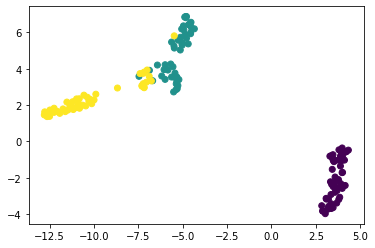

In [32]:
plt.scatter(umap_iris[:,0], umap_iris[:,1],c=y);

In [10]:
%matplotlib inline

from ipywidgets import interact, IntSlider

In [18]:
def umapped_irises(n, c, s):
    fig, ax = plt.subplots()

    umap_i = umap.UMAP(n_neighbors=n, local_connectivity=c, repulsion_strength=s, random_state=1234)
    umap_iris = umap_i.fit_transform(X)
    ax.scatter(umap_iris[:,0], umap_iris[:,1], c = y);
    plt.show()

In [21]:
#fig, ax = plt.subplots()

_=interact(umapped_irises, n=IntSlider(min=1, max=50, value=14, step=1), 
          c=IntSlider(min=1, max=10, value=1, step=1), s=IntSlider(min=1, max=10, value=1, step=1))


interactive(children=(IntSlider(value=14, description='n', max=50, min=1), IntSlider(value=1, description='c',…

Рассмотренные методы обладают следующими достоинствами и недостатками.
- PCA 
    * быстрый (+);
    * повторяющиеся результаты (+);
    * можно добавить новые точки (+);
    * строит проекцию, то есть часть данных теряется (-).
- t-SNE и UMAP 
    * стараются сохранить расстояния между точками (+);
    * это достигается за счет нелинейных искажений (+-);
    * медленнее PCA (-);
    * а текущий момент добавление новых точек возможно только для реализаций UMAP.
- MDS - занимает промежуточное положение среди двух групп методов.
    

А теперь посмотрим как выглядят на плоскости пассажиры "Титаника".<br>
Подробно о том как можно анализировать этот набор данных - <a href="https://habr.com/post/202090/">здесь</a>.

In [39]:
titanic_data2=pd.read_csv("data/00_titanic_train.csv")

In [20]:
titanic_data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_data2=titanic_data2.replace({'Sex': 'male'}, 0)
titanic_data2=titanic_data2.replace({'Sex': 'female'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'S'}, 0)
titanic_data2=titanic_data2.replace({'Embarked': 'C'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'Q'}, 2)
# Для некоторых пассажиров возраст не указан. Заменяем его на медиану или нормальное распределение вокруг нее.
#titanic_data2.Age[titanic_data2.Age.isnull()]=titanic_data2.Age.median()
titanic_data2.Age[titanic_data2.Age.isnull()]=np.random.normal(loc=titanic_data2.Age.median(), scale=3,
                                                               size=(len(titanic_data2.Age[titanic_data2.Age.isnull()])))
titanic_data=titanic_data2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].dropna()

/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


<IPython.core.display.Javascript object>


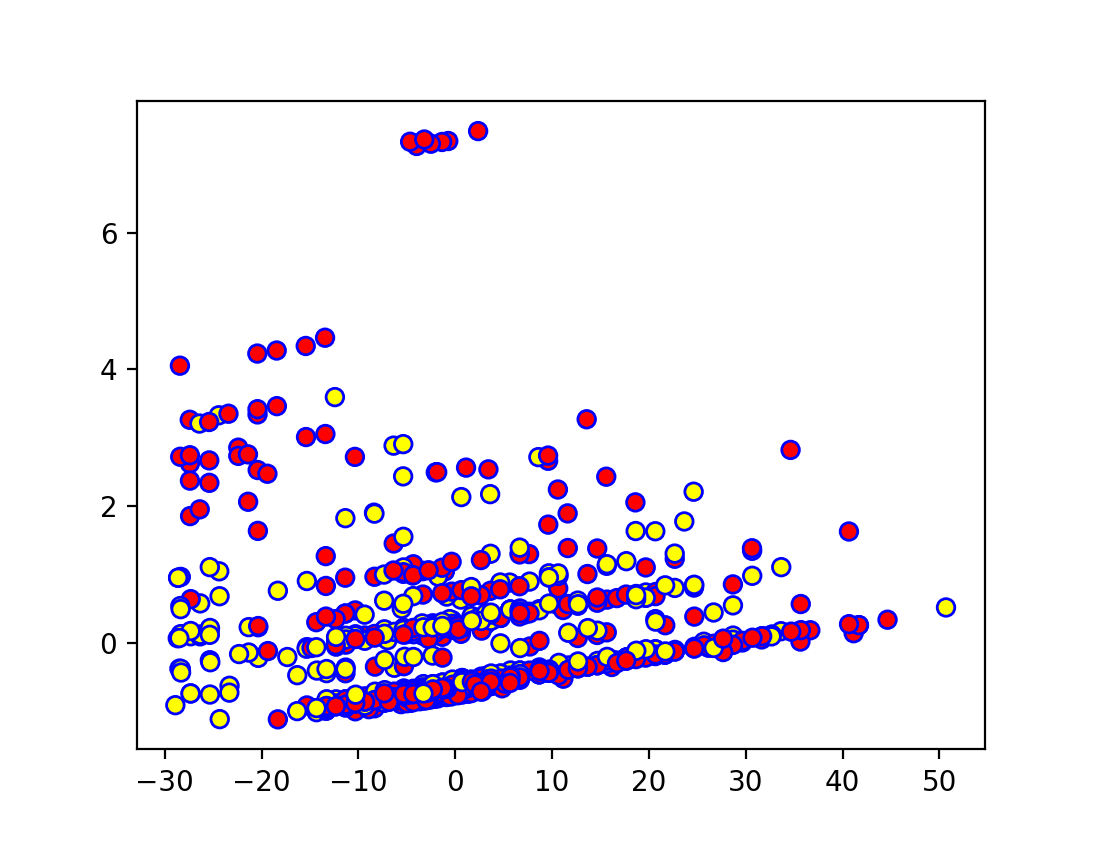

In [19]:
pca=PCA(n_components=2)
show_reduced = pca.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


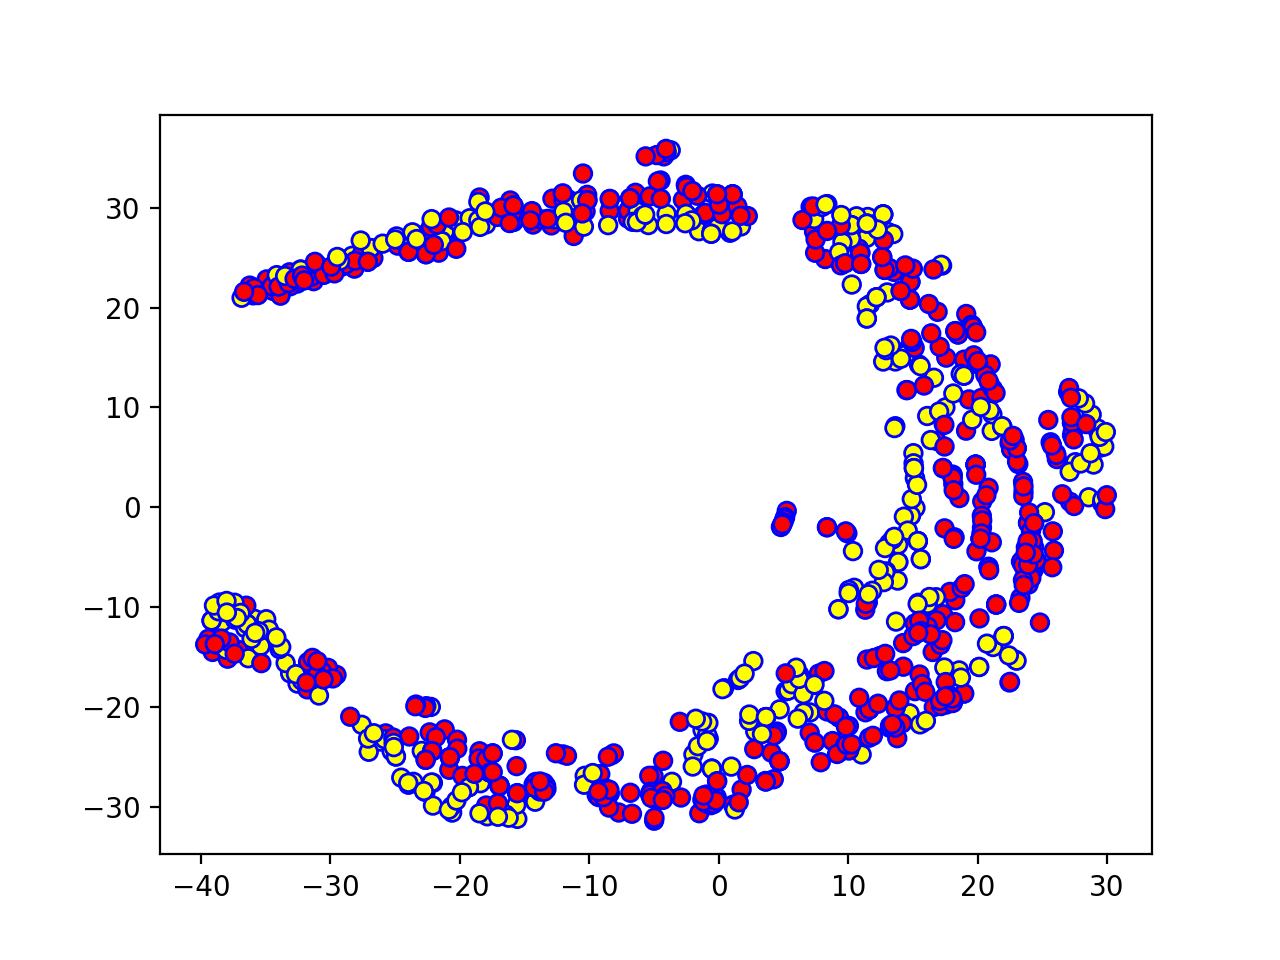

In [20]:
show_reduced = tsne.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


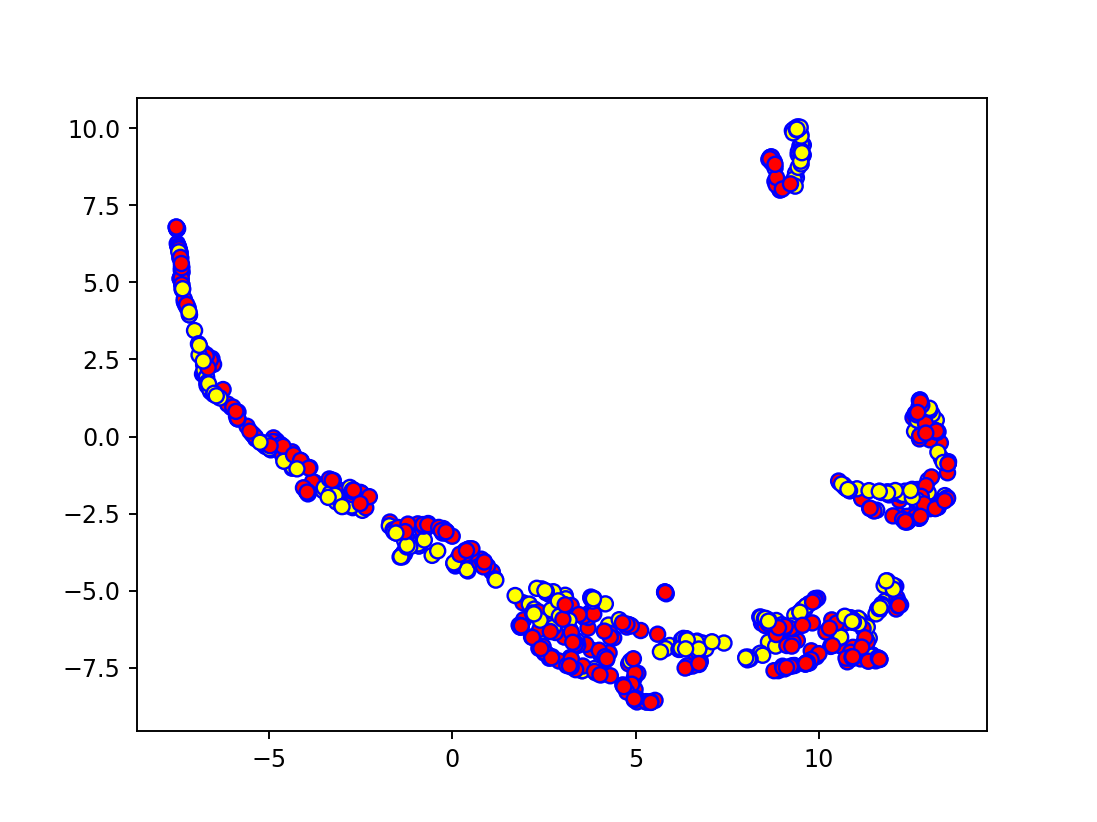

In [34]:
show_reduced = umap_emb.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

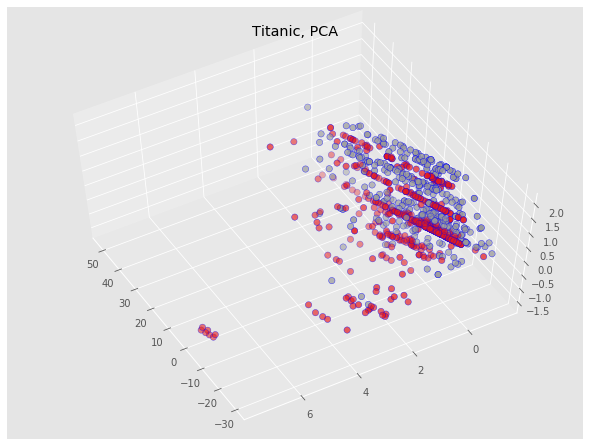

In [46]:
pca3=PCA(n_components=3)
show_reduced = pca3.fit_transform(titanic_data)

fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic, PCA")

plt.show()

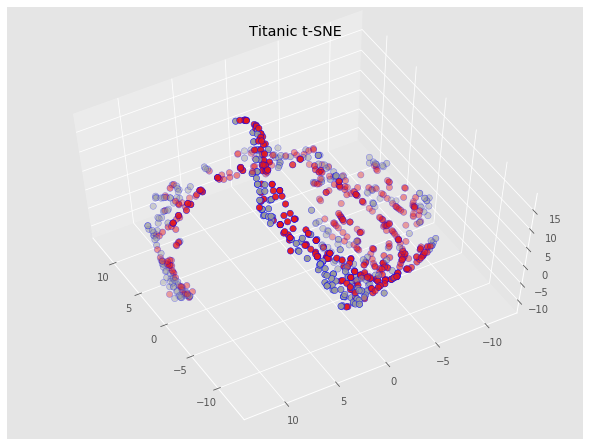

In [48]:
tsne3=TSNE(n_components=3)
show_reduced = tsne3.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic t-SNE")

plt.show()

Кроме того, попробуем посмотреть как изменятся результаты классификации после применения преобразования пространства.

In [36]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate

In [43]:
scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], 
                                          titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.10474157, 0.0916636 , 0.08150816, 0.073313  , 0.08302808,
       0.06404114, 0.10765481, 0.14439631, 0.11429024, 0.08714724,
       0.08022594, 0.08387899, 0.06977773, 0.07621884, 0.07425141,
       0.06734443, 0.06862545, 0.09360385, 0.09749007, 0.0707953 ,
       0.07889748, 0.09066534, 0.0852735 , 0.10112906, 0.08771229,
       0.08661222, 0.07583451, 0.09127164, 0.06385446, 0.10586905]), 'score_time': array([0.10434699, 0.10429049, 0.10278249, 0.1044445 , 0.10378194,
       0.10437679, 0.10515332, 0.10445333, 0.10565782, 0.10354686,
       0.10315418, 0.10356855, 0.10534596, 0.10406041, 0.10398602,
       0.10292935, 0.1037848 , 0.10464764, 0.10483193, 0.10425234,
       0.10466504, 0.10465169, 0.10436416, 0.10520411, 0.10467839,
       0.10347748, 0.10458684, 0.10271668, 0.10709262, 0.10529995]), 'test_score': array([0.64516129, 0.67741935, 0.70967742, 0.70967742, 0.83870968,
       0.77419355, 0.77419355, 0.77419355, 0.74193548, 0.83333333,
       0.82758621

In [47]:
reduced_titanic = pca3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.15560079, 0.14253426, 0.15561581, 0.10121894, 0.09470081,
       0.08369684, 0.09185553, 0.09037971, 0.0684948 , 0.07619596,
       0.0996325 , 0.09609294, 0.16863179, 0.20272422, 0.12739468,
       0.14687896, 0.07608175, 0.07228088, 0.08784604, 0.08793974,
       0.08540916, 0.16542649, 0.13887525, 0.18556762, 0.19574904,
       0.18398714, 0.19221234, 0.19835567, 0.15236139, 0.14218855]), 'score_time': array([0.10382986, 0.10376167, 0.10549212, 0.10266733, 0.10264754,
       0.10482526, 0.1039331 , 0.10229802, 0.1054976 , 0.10360575,
       0.10364509, 0.10382533, 0.10353398, 0.10369015, 0.10357332,
       0.10361528, 0.10435104, 0.10387063, 0.10452104, 0.10438275,
       0.10390425, 0.10394883, 0.10391402, 0.10346937, 0.10358739,
       0.10392046, 0.10345221, 0.10398555, 0.10541344, 0.10355544]), 'test_score': array([0.61290323, 0.70967742, 0.70967742, 0.64516129, 0.80645161,
       0.61290323, 0.70967742, 0.77419355, 0.67741935, 0.83333333,
       0.68965517

In [49]:
reduced_titanic = tsne3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.07688069, 0.06379485, 0.08697581, 0.09037066, 0.0862    ,
       0.08099198, 0.11061788, 0.0914855 , 0.08582973, 0.08676267,
       0.06383085, 0.07222819, 0.1009233 , 0.17894721, 0.19638371,
       0.15411925, 0.12155747, 0.09082913, 0.08995676, 0.07501721,
       0.07681012, 0.08806944, 0.1247108 , 0.09245634, 0.08881593,
       0.06834126, 0.09293032, 0.09477878, 0.09404039, 0.08855319]), 'score_time': array([0.10314798, 0.1038394 , 0.10378504, 0.1040194 , 0.10277128,
       0.10381126, 0.10392189, 0.10402846, 0.10365653, 0.1025877 ,
       0.10452628, 0.10448194, 0.10406137, 0.10433149, 0.10388994,
       0.10377145, 0.10304308, 0.10388398, 0.10259414, 0.10360503,
       0.10364389, 0.10358405, 0.10458636, 0.10378146, 0.10368657,
       0.10393453, 0.10416389, 0.10397148, 0.10374451, 0.10366869]), 'test_score': array([0.70967742, 0.67741935, 0.74193548, 0.61290323, 0.77419355,
       0.64516129, 0.74193548, 0.70967742, 0.5483871 , 0.8       ,
       0.75862069

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

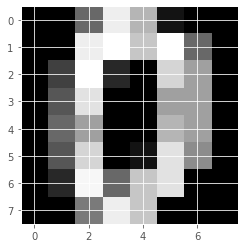

In [25]:
img = digits.images
plt.imshow(img[0], cmap=plt.cm.Greys_r);

In [26]:
img[0].shape

(8, 8)

In [27]:
X = img.reshape(-1, 64)

In [28]:
X.shape

(1797, 64)

In [29]:
y = digits.target

In [30]:
tsne2d=PCA(n_components=2)
show_reduced = tsne2d.fit_transform(X)


In [31]:
len(show_reduced)

1797

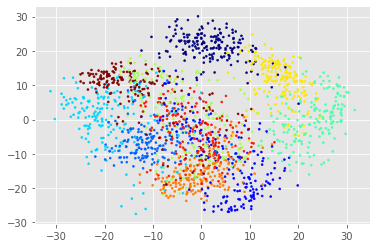

In [32]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

In [33]:
tsne2d2=umap.UMAP(n_components=2)
show_reduced = tsne2d2.fit_transform(X)


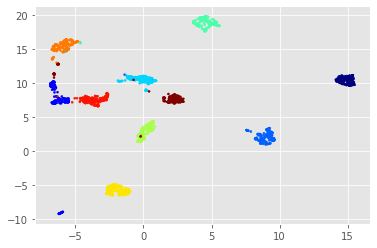

In [34]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

Рассмотренные методы позволяют проводить следующие действия:
- визуализировать многомерные данные в ходе предварительного анализа, визуализация позволяет прийти к преварительным выводам о возмоности или невозможности применения разных методов анализа;
- снизить размерность анализируемых данных и получить выигрыш в скорости обработки;
- точность анализа после преобразования пространства может как снизиться, так и увеличиться в зависимости от природы данных;
- методы t-SNE и UMAP позволяют работать с предварительно рассчитанными матрицами расстояниями между точками, за счет этого можно преобразовать неметрическое пространство в метрическое.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
with open("data/lenta2018.txt", encoding="utf-8") as news_file: # Файл с новостями.
    text_news = [n.split("-----\n")[1] for n in news_file.read().split("=====\n")[1:]]
    

In [21]:
cvct = TfidfVectorizer(text_news, 
                       token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+", 
                       ngram_range=(1, 2))

In [22]:
tfidf_res = cvct.fit_transform(text_news)

In [24]:
umap_text = umap.UMAP(n_components=2)
text_reduced = umap_text.fit_transform(tfidf_res)

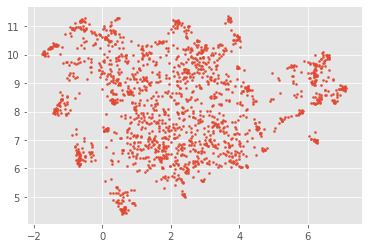

In [25]:
fig, ax = plt.subplots()
ax.scatter(text_reduced[:, 0], text_reduced[:, 1], s=4)
plt.show()

In [40]:
center = np.array([0.5, 5.])
texts_group = [i for i, pt in enumerate(text_reduced) if np.linalg.norm(center-pt)<0.3]

In [41]:
[text_news[i][:100] for i in texts_group]

['Ученые заявили о возможном скором перевороте магнитных полюсов Земли, а также последующих за этим ка',
 'Американские археологи обнаружили в Гватемале следы более 60 тысяч ранее неизвестных сооружений, при',
 'Специалисты НАСА подтвердили существование в атмосфере Титана винилцианида — соединения, которое мож',
 'Ученые Чикагского университета нашли доказательства, что около 13 тысяч лет назад на Землю упала ком',
 'Египетские археологи обнаружили гробницу, возраст которой составляет более четырех тысяч лет. Захоро',
 'Ученые британского Эксетерского университета выявили в организме подростков следы бисфенола А — хими',
 'Ученые Геологической службы США выяснили, что в вечной мерзлоте северного полушария Земли скопилось ',
 'Ученые Университета Британской Колумбии выяснили, что в нижних слоях атмосферы находятся миллионы ви',
 'Американские физики Ливерморской национальной лаборатории получили новую форму вещества, названную с',
 'Ученые Аризонского университета выяснили, что изверже

In [51]:
umap_text3 = umap.UMAP(n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

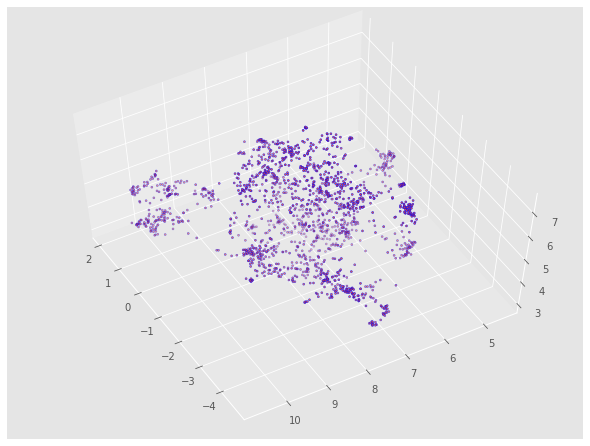

In [53]:
fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(text_reduced3[:, 0], text_reduced3[:, 1], text_reduced3[:, 2], edgecolor='b', s=4);


In [67]:
center3 = np.array([1., 10., 4.])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<0.3]
[text_news[i][:100] for i in texts_group3]

['Министерство юстиции США начало расследование фактов коррупции в Международном олимпийском комитете ',
 'Суд Швейцарии отклонил иск шести российских спортсменов к Международному олимпийскому комитету (МОК)',
 'Президент Международного олимпийского комитета (МОК) Томас Бах заявил, что вопрос о допуске оправдан',
 'Международный олимпийский комитет (МОК) задумался об исключении бокса из программы Олимпийских игр 2',
 'На открытии Игр в Пхенчхане флаг Международного олимпийского комитета (МОК), под которым выступят ро',
 'Офицеры Всемирного антидопингового агентства (WADA) сорвали тренировку женской сборной России по хок',
 'Президент Международного олимпийского комитета (МОК) Томас Бах рассказал, что комиссия, решавшая воп',
 'Решение Спортивного арбитражного суда (CAS) подтверждает необоснованность подозрений насчет российск',
 'Российская команда по биатлону не примет участия в церемонии открытия Олимпийских игр 2018 года. Об ',
 'Президент Международного олимпийского комитета (МОК) 

In [75]:
umap_text3 = umap.UMAP(n_neighbors=5, n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

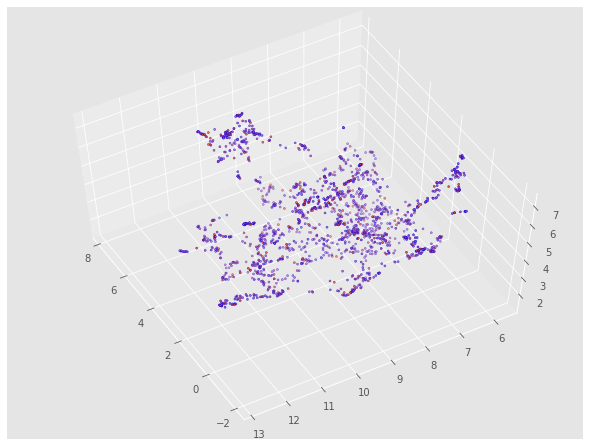

In [76]:
fig = plt.figure(5, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(text_reduced3[:, 0], text_reduced3[:, 1], text_reduced3[:, 2], edgecolor='b', s=4);


In [98]:
center3 = np.array([6.4, 9.2, 5.7])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<0.3]
[text_news[i][:100] for i in texts_group3]

['На открытии Игр в Пхенчхане флаг Международного олимпийского комитета (МОК), под которым выступят ро',
 'Российская команда по биатлону не примет участия в церемонии открытия Олимпийских игр 2018 года. Об ',
 'Российские лыжники не примут участия в церемонии открытия Олимпийских игр 2018 года. Об этом сообщае',
 'В церемонии открытия Олимпийских игр в южнокорейском Пхенчхане примут участие 70-75 российских спорт',
 'Николь Ховерц, член рабочей группы Международного олимпийского комитета (МОК), раскрыла условия снят',
 'Активистка организации PETA («Люди за этичное обращение с животными») Эшли Фруно провела акцию проте',
 'Британским спортсменам рекомендовано пропустить церемонию открытия зимних Олимпийских игр 2018 года ',
 'Президент Международного олимпийского комитета (МОК) Томас Бах рассказал о необходимых условиях того',
 'Генеральный секретарь Федерации бобслея России Сергей Пархоменко рассказал об условиях пребывания ол',
 'Руководитель делегации олимпийских атлетов из России 

## Поиск нечетких дубликатов

In [101]:
from snapy import MinHash, LSH

In [121]:
minhash = MinHash(text_news, n_gram=20, permutations=100, hash_bits=64, seed=3)

In [122]:
lsh = LSH(minhash, 
          [i for i in range(len(text_news))], 
          no_of_bands=50)

In [125]:
lsh.adjacency_list()

{0: [516],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [651, 753, 1271, 1292, 1250],
 36: [62],
 37: [],
 38: [],
 39: [49, 59, 114, 115, 327, 90],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [114, 444, 924, 1010, 1029, 1556],
 49: [39, 59, 114, 115, 327, 73, 127, 138],
 50: [],
 51: [],
 52: [],
 53: [63],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [264, 39, 49, 114, 115, 327, 73, 127],
 60: [],
 61: [],
 62: [36],
 63: [261, 650, 53],
 64: [],
 65: [838],
 66: [],
 67: [],
 68: [378],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [49, 127, 138, 173, 526, 737, 59, 327],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [277],
 87: [],


In [127]:
[text_news[i][:100] for i in lsh.adjacency_list()[39]]


['Российская сборная вновь займет первое место в медальном зачете Олимпийских игр 2014 года в Сочи пос',
 'Международный олимпийский комитет (МОК) прокомментировал решение об оправдании российских атлетов Сп',
 'Президент России Владимир Путин прокомментировал решение Спортивного арбитражного суда (CAS), аннули',
 'Информатор Всемирного антидопингового агентства (WADA), бывший глава Московской антидопинговой лабор',
 'Комиссия Международного олимпийского комитета (МОК) рассмотрит приглашение 15 российских спортсменов',
 'Серебряный призер Олимпийских игр 2014 года Альберт Демченко, чью пожизненную дисквалификацию отмени']